# An√°lisis de Texto en Python: Bag of Words

* * * 

<div class="alert alert-success">  
    
### Objetivos de aprendizaje
    
* Aprender a convertir datos de texto en n√∫meros a trav√©s del enfoque Bag-of-Words.

*  Entender el algoritmo TF-IDF y c√≥mo complementa la representaci√≥n Bag-of-Words.

*  Implementar Bag-of-Words y TF-IDF usando el paquete sklearn y comprender la configuraci√≥n de sus par√°metros.

*  Usar las representaciones num√©ricas de los datos de texto para realizar un an√°lisis de sentimientos.
</div>

### Iconos utilizados en este cuaderno
üîî **Pregunta**: Una pregunta r√°pida para comprender que se esta realizando.<br>
ü•ä **Desaf√≠o**: Ejercicio interactivo. ¬°Trabajaremos en esto en el taller!<br>
üé¨ **Demostraci√≥n**: Mostrando algo m√°s avanzado, ¬°para que veas para qu√© se puede usar Python!<br> 

### Secciones
1. [Exploratory Data Analysis](#section1)
2. [Preprocesamiento](#section2)
3. [La Representaci√≥n Bag-of-Words](#section3)
4. [Frecuencia de T√©rmino - Frecuencia Inversa de Documento.](#section4)
5. [Clasificaci√≥n de Sentimientos Usando la Representaci√≥n TF-IDF](#section5)

En la parte anterior, aprendimos c√≥mo realizar el preprocesamiento de texto. Sin embargo, no fuimos m√°s all√° de los datos de texto en s√≠. Si estamos interesados en realizar alg√∫n an√°lisis computacional sobre los datos de texto, todav√≠a necesitamos enfoques para convertir el texto en una **representaci√≥n num√©rica**.

En la Parte 2 de nuestra serie de talleres, exploraremos una de las formas m√°s sencillas de generar una representaci√≥n num√©rica a partir de texto: la **bag-of-words** (BoW)(Lo que significa bolsa de palabras). Implementaremos la representaci√≥n BoW para transformar nuestros datos de tuits de aerol√≠neas y luego construiremos un clasificador para explorar lo que nos dice sobre el sentimiento de los tuits. En el coraz√≥n del enfoque de bolsa de palabras se encuentra la suposici√≥n de que la frecuencia de tokens espec√≠ficos es informativa sobre la sem√°ntica y el sentimiento subyacentes al texto.

Haremos un uso intensivo del paquete `scikit-learn` para ello, ya que proporciona un buen marco para construir la representaci√≥n num√©rica.

Primero, instalemos `scikit-learn`«É

In [1]:
# Instalar el paquete scikit-learn
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Instalamos la nueva version de pip disponible: 24.3.1 -> 25.0.1
%pip install --upgrade pip

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Instalar los paquetes de NLP presentados en la Parte 1.
%pip install NLTK
%pip install spaCy
!python -m spacy download en_core_web_sm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.5/1.5 MB 29.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 796.9/796.9 kB 29.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.8/31.8 MB 53.2 MB/s eta 0:00:00:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 45.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 41.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [4]:
# Instalamos la nueva version de pip disponible: 24.3.1 -> 25.0.1
!python -m pip install --upgrade pip

In [5]:
# Importar otros paquetes
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
%matplotlib inline

<a id='section1'></a>

# An√°lisis Exploratorio de Datos

Antes de realizar cualquier preprocesamiento o modelado, siempre debemos realizar un an√°lisis exploratorio de datos para familiarizarnos con los datos.

In [6]:
# Leer los datos
tweets_path = '../data/airline_tweets.csv'
tweets = pd.read_csv(tweets_path, sep=',')

In [7]:
tweets.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

Como recordatorio, cada fila en este dataframe corresponde a un tuit. Las siguientes columnas son de nuestro principal inter√©s. Existen otras columnas que contienen metadatos del tuit, como el autor del tuit, cu√°ndo fue creado, la zona horaria del usuario y otras, las cuales dejaremos de lado por ahora.

- `text` (`str`): el texto del tuit.
- `airline_sentiment` (`str`): el sentimiento del tuit, etiquetado como "neutral," "positive" o "negative." 
- `airline` (`str`): la aerol√≠nea sobre la que se tuitea.
- `retweet count` (`int`): cu√°ntas veces fue retuiteado el tuit.

Para prepararnos para la clasificaci√≥n de sentimientos, particionaremos el conjunto de datos para centrarnos en los tuits "positivos" y "negativos" por ahora.

In [8]:
tweets = tweets[tweets['airline_sentiment'] != 'neutral'].reset_index(drop=True)

¬°Veamos algunos tuits primero!

In [9]:
#Imprimir los primeros cinco tuits:
for idx in range(5):
    print(tweets['text'].iloc[idx])

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this ‚Äúear worm‚Äù won‚Äôt go away :)


Ya podemos ver que algunos de estos tuits contienen un sentimiento negativo. ¬øC√≥mo podemos saber que esto es as√≠?

A continuaci√≥n, veamos la distribuci√≥n de las etiquetas de sentimiento en este conjunto de datos.

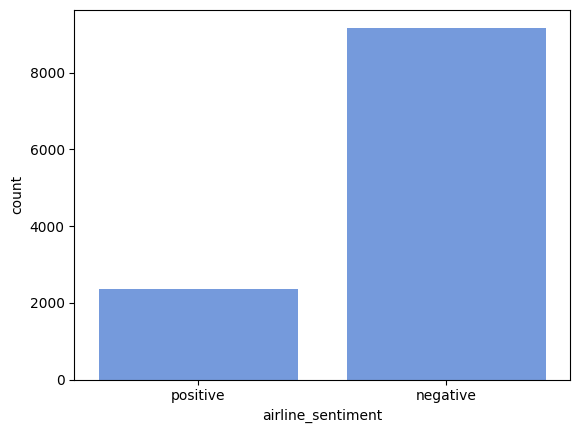

In [ ]:
# Aqu√≠ vemos el c√≥digo para hacer un gr√°fico de barras que muestre la cantidad de tuits por sentimiento:
sns.countplot(data=tweets,
              x='airline_sentiment', 
              color='cornflowerblue',
              order=['positive', 'negative']);

Parece que la mayor√≠a de los tuits en este conjunto de datos expresan sentimiento negativo!

Ahora, veamos a qu√© tuits son los m√°s retuiteados:

In [11]:
# Aqu√≠ vemos el c√≥digo para obtener la media del n√∫mero de retuits para cada sentimiento:
tweets.groupby('airline_sentiment')['retweet_count'].mean()

airline_sentiment
negative    0.093375
positive    0.069403
Name: retweet_count, dtype: float64

¬°Los tuits negativos claramente son retuiteados m√°s a menudo que los positivos!

Ahora, veamos a qu√© aerol√≠nea recibe m√°s tuits negativos:

In [12]:
# Aqu√≠ vemos el c√≥digo para obtener la proporci√≥n de tuits negativos por aerol√≠nea:
proportions = tweets.groupby(['airline', 'airline_sentiment']).size() / tweets.groupby('airline').size()
proportions.unstack().sort_values('negative', ascending=False)

airline_sentiment  negative  positive
airline                              
US Airways         0.893760  0.106240
American           0.853659  0.146341
United             0.842560  0.157440
Southwest          0.675399  0.324601
Delta              0.637091  0.362909
Virgin America     0.543544  0.456456

¬°Parece que la gente est√° m√°s insatisfecha con US Airways, seguida de American Airlines, ambas con m√°s del 85% de tuits negativos!

Se pueden hacer muchos descubrimientos interesantes si deseas explorar m√°s sobre los datos. Ahora volvamos a nuestra tarea de an√°lisis de sentimientos. Antes de eso, necesitamos preprocesar los datos de texto para que est√©n en un formato est√°ndar.

<a id='section2'></a>
# Preprocesamiento

Pasamos gran parte de la Parte 1 aprendiendo c√≥mo preprocesar los datos. ¬°Ahora apliquemos lo que aprendimos! Al observar algunos de los tuits anteriores, podemos ver que, aunque est√°n bastante bien, podemos hacer algunos ajustes adicionales en ellos.

En nuestra pipeline, omitiremos el proceso de tokenizaci√≥n ya que lo realizaremos en un paso posterior.

## ü•ä Desaf√≠o 1: Aplica una Pipeline de Limpieza de Texto

Escribe una funci√≥n llamada `preprocess` que realice los siguientes pasos en un texto de entrada:

* Paso 1: Convierte el texto a min√∫sculas.
* Paso 2: Reemplaza los siguientes patrones por marcadores de posici√≥n:
    * URLs &rarr; ` URL `
    * Digitos &rarr; ` DIGIT `
    * Hashtags &rarr; ` HASHTAG `
    * Handles de Tweets &rarr; ` USER `
* Paso 3: Elimina los espacios en blanco extra.

Aqu√≠ hay algunos consejos para guiarte en este desaf√≠o:

* Paso 1, recuerda que en la Parte 1 se us√≥ el m√©todo  [`.lower()`](https://docs.python.org/3.11/library/stdtypes.html#str.lower) para convertir el texto a min√∫sculas.
* Paso 2, ya est√° integrado en una funci√≥n llamada `placeholder`. Ejecuta la celda de abajo para importarla y √∫sala como cualquier otra funci√≥n.
* Paso 3, proporcionamos el patr√≥n regex para identificar los caracteres de espacio en blanco y el reemplazo correcto para extraer los espacios.

Ejecuta la funci√≥n `preprocess` en `example_tweet` (tres celdas m√°s abajo) para verificar si funciona. Si es as√≠, apl√≠cala a toda la columna `text` en el dataframe de tuits.

In [13]:
from utils import placeholder

/workspaces/Python-Text-Analysis_grupo_4/lessons/utils.py:4: SyntaxWarning: invalid escape sequence '\d'
  digit_pattern = '\d+'
/workspaces/Python-Text-Analysis_grupo_4/lessons/utils.py:14: SyntaxWarning: invalid escape sequence '\d'
  digit_pattern = '\d+'


In [ ]:
blankspace_pattern = r'\s+'
blankspace_repl = ' '

def preprocess(text):
    '''Create a preprocess pipeline that cleans the tweet data.'''
    
    # Paso 1: Convertir a min√∫sculas
    text = ...

    # Paso 2: Reemplazar patrones por marcadores de posici√≥n
    text = ...

    # Paso 3: Eliminar caracteres de espacio en blanco extra
    text = ...

    return text

In [ ]:
example_tweet = 'lol @justinbeiber and @BillGates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo'

# Imprimir el tweet de ejemplo
print(example_tweet)
print(f"{'='*50}")

# Imprimir el tweet procesado
print(preprocess(example_tweet))

lol @justinbeiber and @BillGates are like soo 2000 #yesterday #amiright saw it on https://twitter.com #yolo
Ellipsis


In [16]:
# Aplicar la funci√≥n a la columna de texto y asignar los tweets preprocesados a una nueva columna
tweets['text_processed'] = tweets['text'].apply(lambda x: preprocess(x))
tweets['text_processed'].head()

0    Ellipsis
1    Ellipsis
2    Ellipsis
3    Ellipsis
4    Ellipsis
Name: text_processed, dtype: object

¬°Felicidades! El preprocesamiento est√° completo. ¬°Ahora vamos a sumergirnos en la bolsa de palabras (bag-of-words)!

<a id='section3'></a>
# The Bag-of-Words Representation

The idea of bag-of-words (BoW), as the name suggests, is quite intuitive: we take a document and toss it in a bag. The action of "throwing" the document in a bag disregards the relative position between words, so what is "in the bag" is essentially "an unsorted set of words" [(Jurafsky & Martin, 2024)](https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf). In return, we have a list of unique words and the frequency of each of them. 

For example, as shown in the following illustration, the word "coffee" appears twice. 

<img src='../images/bow-illustration-1.png' alt="BoW-Part2" width="600">

With a bag-of-words representation, we make heavy use of word frequency but not too much of word order. 

In the context of sentiment analysis, the sentiment of a tweet is conveyed more strongly by specific words. For example, if a tweet contains the word "happy," it likely conveys positive sentiment, but not always (e.g., "not happy" denotes the opposite sentiment). When these words come up more often, they'll probably more strongly convey the sentiment.

## Document Term Matrix

Now let's implement the idea of bag-of-words. Before we dive deeper, let's step back for a moment. In practice, text analysis often involves handling many documents; from now on, we use the term **document** to represent a piece of text on which we perform analysis. It could be a phrase, a sentence, a tweet, or any other text‚Äîas long as it can be represented by a string, the length dosen't really matter. 

Imagine we have four documents (i.e., the four phrases shown above), and we toss them all in the bag. Instead of a word-frequency list, we'd expect a document-term matrix (DTM) in return. In a DTM, the word list is the **vocabulary** (V) that holds all unique words occur across the documents. For each **document** (D), we count the number of occurence of each word in the vocabulary, and then plug the number into the matrix. In other words, the DTM we will construct is a $D \times V$ matrix, where each row corresponds to a document, and each column corresponds to a token (or "term").

The unique tokens in this set of documents, arranged in alphabetical order, form the columns. For each document, we mark the occurence of each word present in the document. The numerical representation for each document is a row in the matrix. For example, the first document, "the coffee roaster," has the numerical representation $[0, 1, 0, 0, 0, 1, 1, 0]$.

Note that the left index column now displays these documents as text, but typically we would just assign an index to each of them. 

$$
\begin{array}{c|cccccccccccc}
 & \text{americano} & \text{coffee} & \text{iced} & \text{light} & \text{roast} & \text{roaster} & \text{the} & \text{time} \\\hline
\text{the coffee roaster} &0 &1	&0	&0	&0	&1	&1	&0 \\ 
\text{light roast} &0 &0	&0	&1	&1	&0	&0	&0 \\
\text{iced americano} &1 &0	&1	&0	&0	&0	&0	&0 \\
\text{coffee time} &0 &1	&0	&0	&0	&0	&0	&1 \\
\end{array}
$$

To create a DTM, we will use `CountVectorizer` from the package `sklearn`.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

The following illustration depicts the three-step workflow of creating a DTM with `CountVectorizr`.

<img src='../images/CountVectorizer1.png' alt="CountVectorizer" width="500">

Let's walk through these steps with the toy example shown above.

### A Toy Example

In [14]:
# A toy example containing four documents
test = ['the coffee roaster',
        'light roast',
        'iced americano',
        'coffee time']

The first step is to initialize a `CountVectorizer` object. Within the round paratheses, we can specify parameter settings if desired. Let's take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and see what options are available.  

For now we can just leave it blank to use the default settings. 

In [15]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

The second step is to `fit` this `CountVectorizer` object to the data, which means creating a vocabulary of tokens from the set of documents. Thirdly, we `transform` our data according to the "fitted" `CountVectorizer` object, which means taking each of the document and counting the occurrences of tokens according to the vocabulary established during the "fitting" step.

It may sound a bit complex but steps 2 and 3 can be done in one swoop using a `fit_transform` function.

In [16]:
# Fit and transform to create a DTM
test_count = vectorizer.fit_transform(test)

The return of `fit_transform` is supposed to be the DTM. 

Let's take a look at it!

In [17]:
test_count

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

Apparently we've got a "sparse matrix"‚Äîa matrix that contains a lot of zeros. This makes sense. For each document, there are words that don't occur at all, and these are counted as zero in the DTM. This sparse matrix is stored in a "Compressed Sparse Row" format, a memory-saving format designed for handling sparse matrices. 

Let's convert it to a dense matrix, where those zeros are probably represented, as in a numpy array.

In [18]:
# Convert DTM to a dense matrix 
test_count.todense()

matrix([[0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1]])

So this is our DTM! The matrix is the same as shown above. To make it more reader-friendly, let's convert it to a dataframe. The column names should be tokens in the vocabulary, which we can access with the `get_feature_names_out` function.

In [19]:
# Retrieve the vocabulary
vectorizer.get_feature_names_out()

array(['americano', 'coffee', 'iced', 'light', 'roast', 'roaster', 'the',
       'time'], dtype=object)

In [20]:
# Create a DTM dataframe
test_dtm = pd.DataFrame(data=test_count.todense(),
                        columns=vectorizer.get_feature_names_out())

Here it is! The DTM of our toy data is now a dataframe. The index of `test_dtm` corresponds to the position of each document in the `test` list. 

In [21]:
test_dtm

americano  coffee  iced  light  roast  roaster  the  time
0          0       1     0      0      0        1    1     0
1          0       0     0      1      1        0    0     0
2          1       0     1      0      0        0    0     0
3          0       1     0      0      0        0    0     1

Hopefully this toy example provides a clear walkthrough of creating a DTM.

Now it's time for our tweets data!

### DTM for Tweets

We'll begin by initializing a `CountVectorizer` object. In the following cell, we have included a few parameters that people often adjust. These parameters are currently set to their default values.

When we construct a DTM, the default is to lowercase the input text. If nothing is provided for `stop_words`, the default is to keep them. The next three parameters are used to control the size of the vocabulary, which we'll return to in a minute.

In [22]:
# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             min_df=1,
                             max_df=1.0, 
                             max_features=None)

In [23]:
# Fit and transform to create DTM
counts = vectorizer.fit_transform(tweets['text_processed'])
counts

<11541x8751 sparse matrix of type '<class 'numpy.int64'>'
	with 191139 stored elements in Compressed Sparse Row format>

In [24]:
# Do not run if you have limited memory - this includes DataHub and Binder
np.array(counts.todense())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# Extract tokens
tokens = vectorizer.get_feature_names_out()

In [26]:
# Create DTM
first_dtm = pd.DataFrame(data=counts.todense(),
                         index=tweets.index,
                         columns=tokens)

# Print the shape of DTM
print(first_dtm.shape)

(11541, 8751)


If we leave the `CountVectorizer` to the default setting, the vocabulary size of the tweet data is 8751. 

In [27]:
first_dtm.head()

_exact_  _wtvd  aa  aaaand  aadv  aadvantage  aal  aaron  ab  aback  ...  \
0        0      0   0       0     0           0    0      0   0      0  ...   
1        0      0   0       0     0           0    0      0   0      0  ...   
2        0      0   0       0     0           0    0      0   0      0  ...   
3        0      0   0       0     0           0    0      0   0      0  ...   
4        0      0   0       0     0           0    0      0   0      0  ...   

   zero  zig  zip  zippers  zone  zones  zoom  zukes  zurich  zz  
0     0    0    0        0     0      0     0      0       0   0  
1     0    0    0        0     0      0     0      0       0   0  
2     0    0    0        0     0      0     0      0       0   0  
3     0    0    0        0     0      0     0      0       0   0  
4     0    0    0        0     0      0     0      0       0   0  

[5 rows x 8751 columns]

Most of the tokens have zero occurences at least in the first five tweets. 

Let's take a closer look at the DTM!

In [28]:
# Most frequent tokens
first_dtm.sum().sort_values(ascending=False).head(10)

user      12882
to         6987
digit      6927
the        5088
you        3635
for        3386
flight     3320
and        3276
on         3142
my         2751
dtype: int64

In [29]:
# Least frequent tokens
first_dtm.sum().sort_values(ascending=True).head(10)

_exact_                     1
mightmismybrosgraduation    1
midterm                     1
midnite                     1
midland                     1
michelle                    1
michele                     1
michael                     1
mhtt                        1
mgmt                        1
dtype: int64

It is not surprising to see "user" and "digit" to be among the most frequent tokens as we replaced each idiosyncratic one with these placeholders. The rest of the most frequent tokens are mostly stop words.

Perhaps a more interesting pattern is to look for which token appears most in any given tweet:

In [30]:
counts = pd.DataFrame()

# Retrieve the index of the tweet where a token appears most frequently
counts['token'] = first_dtm.idxmax(axis=1)

# Retrieve the number of occurrence 
counts['number'] = first_dtm.max(axis=1)

# Filter out placeholders
counts[(counts['token']!='digit')
       & (counts['token']!='hashtag')
       & (counts['token']!='user')].sort_values('number', ascending=False).head(10)

token  number
3127      lt       6
918    worst       6
10572     to       5
8148     the       5
10742     to       5
152       to       5
5005      to       5
10923    the       5
7750      to       5
355       to       5

It looks like among all tweets, at most a token appears six times, and it is either the word "It" or the word "worst." 

Let's go back to our tweets dataframe and locate the 918th tweet.

In [31]:
# Retrieve 918th tweet: "worst"
tweets.iloc[918]['text']

"@united is the worst. Worst reservation policies. Worst costumer service. Worst worst worst. Congrats, @Delta you're not that bad!"

## Customize the `CountVectorizer`

So far we've always used the default parameter setting to create our DTMs, but in many cases we may want to customize the `CountVectorizer` object. The purpose of doing so is to further filter out unnecessary tokens. In the example below, we tweak the following parameters:

- `stop_words = 'english'`: ignore English stop words 
- `min_df = 2`: ignore words that don't occur at least twice
- `max_df = 0.95`: ignore words if they appear in more than 95\% of the documents

üîî **Question**: Let's pause for a minute to discuss whether it sounds reasonable to set these parameters! What do you think?

Oftentimes, we are not interested in words whose frequencies are either too low or too high, so we use `min_df` and `max_df` to filter them out. Alternatively, we can define our vocabulary size as $N$ by setting `max_features`. In other words, we tell `CountVectorizer` to only consider the top $N$ most frequent tokens when constructing the DTM.

In [32]:
# Customize the parameter setting
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

In [33]:
# Fit, transform, and get tokens
counts = vectorizer.fit_transform(tweets['text_processed'])
tokens = vectorizer.get_feature_names_out()

# Create the second DTM
second_dtm = pd.DataFrame(data=counts.todense(),
                          index=tweets.index,
                          columns=tokens)

Our second DTM has a substantially smaller vocabulary compared to the first one.

In [34]:
print(first_dtm.shape)
print(second_dtm.shape)

(11541, 8751)
(11541, 4471)


In [35]:
second_dtm.head()

aa  aadv  aadvantage  aal  abandoned  abc  ability  able  aboard  abq  ...  \
0   0     0           0    0          0    0        0     0       0    0  ...   
1   0     0           0    0          0    0        0     0       0    0  ...   
2   0     0           0    0          0    0        0     0       0    0  ...   
3   0     0           0    0          0    0        0     0       0    0  ...   
4   0     0           0    0          0    0        0     0       0    0  ...   

   yummy  yup  yvonne  yvr  yyj  yyz  zero  zone  zoom  zurich  
0      0    0       0    0    0    0     0     0     0       0  
1      0    0       0    0    0    0     0     0     0       0  
2      0    0       0    0    0    0     0     0     0       0  
3      0    0       0    0    0    0     0     0     0       0  
4      0    0       0    0    0    0     0     0     0       0  

[5 rows x 4471 columns]

The most frequent token list now includes words that make more sense to us, such as "cancelled" and "service." 

In [36]:
second_dtm.sum().sort_values(ascending=False).head(10)

digit        6927
flight       3320
hashtag      2633
cancelled     956
thanks        921
service       910
just          801
customer      726
time          695
help          687
dtype: int64

## ü•ä Challenge 2: Lemmatize the Text Input

Recall from Part 1 that we introduced using `spaCy` to perform lemmatization, i.e., to "recover" the base form of a word. This process will reduce vocabulary size by keeping word variations minimal‚Äîa smaller vocabularly may help improve model performance in sentiment classification. 

Now let's implement lemmatization on our tweet data and use the lemmatized text to create a third DTM. 

Complete the function `lemmatize_text`. It requires a text input and returns the lemmas of all tokens. 

Here are some hints to guide you through this challenge:

- Step 1: initialize a list to hold lemmas
- Step 2: apply the `nlp` pipeline to the input text
- Step 3: iterate over tokens in the processed text and retrieve the lemma of the token
    - HINT: lemmatization is one of the linguistic annotations that the `nlp` pipeline automatically does for us. We can use `token.lemma_` to access the annotation.

In [37]:
# Import spaCy
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Create a function to lemmatize text
def lemmatize_text(text):
    '''Lemmatize the text input with spaCy annotations.'''

    # Step 1: Initialize an empty list to hold lemmas
    lemma = ...

    # Step 2: Apply the nlp pipeline to input text
    doc = ...

    # Step 3: Iterate over tokens in the text to get the token lemma
    for token in doc:
        lemma.append(...)

    # Step 4: Join lemmas together into a single string
    text_lemma = ' '.join(lemma)
    
    return text_lemma

Let's apply the function to the following example tweet first!

In [39]:
# Apply the function to an example tweet
print(tweets.iloc[33]["text_processed"])
print(f"{'='*50}")
print(lemmatize_text(tweets.iloc[33]['text_processed']))

USER wow this just blew my mind
USER wow this just blow my mind


And then let's lemmatize the tweet data and save the output to a new column `text_lemmatized`.

In [40]:
# This may take a while!
tweets['text_lemmatized'] = tweets['text_processed'].apply(lambda x: lemmatize_text(x))

Now with the `text_lemmatized` column, let's create a third DTM. The parameter setting is the same as the second DTM. 

In [41]:
# Create the vectorizer (the same param setting as previous)
vectorizer = CountVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

# Fit, transform, and get tokens
counts = vectorizer.fit_transform(tweets['text_lemmatized'])
tokens = vectorizer.get_feature_names_out()

# Create the third DTM
third_dtm = pd.DataFrame(data=counts.todense(),
                         index=tweets.index,
                         columns=tokens)
third_dtm.head()

aa  aadv  aadvantage  aal  abandon  abc  ability  able  aboard  abq  ...  \
0   0     0           0    0        0    0        0     0       0    0  ...   
1   0     0           0    0        0    0        0     0       0    0  ...   
2   0     0           0    0        0    0        0     0       0    0  ...   
3   0     0           0    0        0    0        0     0       0    0  ...   
4   0     0           0    0        0    0        0     0       0    0  ...   

   yummy  yup  yvonne  yvr  yyj  yyz  zero  zone  zoom  zurich  
0      0    0       0    0    0    0     0     0     0       0  
1      0    0       0    0    0    0     0     0     0       0  
2      0    0       0    0    0    0     0     0     0       0  
3      0    0       0    0    0    0     0     0     0       0  
4      0    0       0    0    0    0     0     0     0       0  

[5 rows x 3553 columns]

In [42]:
# Print the shapes of three DTMs
print(first_dtm.shape)
print(second_dtm.shape)
print(third_dtm.shape)

(11541, 8751)
(11541, 4471)
(11541, 3553)


Let's print the top 10 most frequent tokens as usual. These tokens are now lemmas and their counts also change after lemmatization. 

In [43]:
# Get the most frequent tokens in the third DTM
third_dtm.sum().sort_values(ascending=False).head(10)

digit       6927
flight      4043
hashtag     2633
thank       1455
hour        1134
cancel       948
delay        937
service      937
customer     902
time         856
dtype: int64

In [44]:
# Compared to the most frequent tokens in the second DTM
second_dtm.sum().sort_values(ascending=False).head(10)

digit        6927
flight       3320
hashtag      2633
cancelled     956
thanks        921
service       910
just          801
customer      726
time          695
help          687
dtype: int64

<a id='section4'></a>

# Term Frequency-Inverse Document Frequency 

So far, we're relying on word frequency to give us information about a document. This assumes if a word appears more often in a document, it's more informative. However, this may not always be the case. For example, we've already removed stop words because they are not informative, despite the fact that they appear many times in a document. We also know the word "flight" is among the most frequent words, but it is not that informative, because it appears in many documents. Since we're looking at airline tweets, we shouldn't be surprised to see the word "flight"!

To remedy this, we use a weighting scheme called **tf-idf (term frequency-inverse document frequency)**. The big idea behind tf-idf is to weight a word not just by its frequency within a document, but also by its frequency in one document relative to the remaining documents. So, when we construct the DTM, we will be assigning each term a **tf-idf score**. Specifically, term $t$ in document $d$ is assigned a tf-idf score as follows:

<img src='../images/tf-idf_finalized.png' alt="TF-IDF" width="1200">

In essence, the tf-idf score of a word in a document is the product of two components: **term frequency (tf)** and **inverse document frequency (idf)**. The idf acts as a scaling factor. If a word occurs in all documents, then idf equals 1. No scaling will happen. But idf is typically greater than 1, which is the weight we assign to the word to make the tf-idf score higher, so as to highlight that the word is informative. In practice, we add 1 to both the denominator and numerator ("add-1 smooth") to prevent any issues with zero occurrences.

We can also create a tf-idf DTM using `sklearn`. We'll use a `TfidfVectorizer` this time:

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Create a tfidf vectorizer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             min_df=2,
                             max_df=0.95,
                             max_features=None)

In [47]:
# Fit and transform 
tf_dtm = vectorizer.fit_transform(tweets['text_lemmatized'])
tf_dtm

<11541x3553 sparse matrix of type '<class 'numpy.float64'>'
	with 88287 stored elements in Compressed Sparse Row format>

In [48]:
# Create a tf-idf dataframe
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out(),
                     index=tweets.index)
tfidf.head()

aa  aadv  aadvantage  aal  abandon  abc  ability  able  aboard  abq  ...  \
0  0.0   0.0         0.0  0.0      0.0  0.0      0.0   0.0     0.0  0.0  ...   
1  0.0   0.0         0.0  0.0      0.0  0.0      0.0   0.0     0.0  0.0  ...   
2  0.0   0.0         0.0  0.0      0.0  0.0      0.0   0.0     0.0  0.0  ...   
3  0.0   0.0         0.0  0.0      0.0  0.0      0.0   0.0     0.0  0.0  ...   
4  0.0   0.0         0.0  0.0      0.0  0.0      0.0   0.0     0.0  0.0  ...   

   yummy  yup  yvonne  yvr  yyj  yyz  zero  zone  zoom  zurich  
0    0.0  0.0     0.0  0.0  0.0  0.0   0.0   0.0   0.0     0.0  
1    0.0  0.0     0.0  0.0  0.0  0.0   0.0   0.0   0.0     0.0  
2    0.0  0.0     0.0  0.0  0.0  0.0   0.0   0.0   0.0     0.0  
3    0.0  0.0     0.0  0.0  0.0  0.0   0.0   0.0   0.0     0.0  
4    0.0  0.0     0.0  0.0  0.0  0.0   0.0   0.0   0.0     0.0  

[5 rows x 3553 columns]

You may have noticed that the vocabulary size is the same as we saw in Challenge 2. This is because we used the same parameter setting when creating the vectorizer. But the values in the matrix are different‚Äîthey are tf-idf scores instead of raw counts. 

## Interpret TF-IDF Values

Let's take a look the document where a term has the highest tf-idf values. We'll use the `.idxmax()` method to find the index.

In [49]:
# Retrieve the index of the document
tfidf.idxmax()

aa            10077
aadv           9285
aadvantage     9974
aal           10630
abandon        7859
              ...  
yyz            1350
zero           2705
zone           3177
zoom           3920
zurich        10622
Length: 3553, dtype: int64

For example, the term "worst" occurs most distinctively in the 918th tweet. 

In [50]:
tfidf.idxmax()['worst']

918

Recall that this is the tweet where the word "worst" appears six times!

In [51]:
tweets['text_processed'].iloc[918]

"USER is the worst. worst reservation policies. worst costumer service. worst worst worst. congrats, USER you're not that bad!"

How about "cancel"? Let's take a look at another example. 

In [52]:
tfidf.idxmax()['cancel']

5945

In [53]:
tweets['text_processed'].iloc[5945]

'USER cancelled flighted üò¢'

## ü•ä Challenge 3: Words with Highest Mean TF-IDF scores

We have obtained tf-idf values for each term in each document. But what do these values tell us about the sentiments of tweets? Are there any words that are  particularly informative for positive/negative tweets? 

To explore this, let's gather the indices of all positive/negative tweets and calculate the mean tf-idf scores of words appear in each category. 

We've provided the following starter code to guide you:
- Subset the `tweets` dataframe according to the `airline_sentiment` label and retrieve the index of each subset (`.index`). Assign the index to `positive_index` or `negative_index`.
- For each subset:
    - Retrieve the td-idf representation 
    - Take the mean tf-idf values across the subset using `.mean()`
    - Sort the mean values in the descending order using `.sort_values()`
    - Get the top 10 terms using `.head()`

Next, run `pos.plot` and `neg.plot` to plot the words with the highest mean tf-idf scores for each subset. 

In [ ]:
# Complete the boolean masks 
positive_index = tweets[...].index
negative_index = tweets[...].index

In [ ]:
# Complete the following two lines
pos = tfidf.loc[...].mean().sort_values(...).head(...)
neg = tfidf.loc[...].mean().sort_values(...).head(...)

In [ ]:
pos.plot(kind='barh', 
         xlim=(0, 0.18),
         color='cornflowerblue',
         title='Top 10 terms with the highest mean tf-idf values for positive tweets');

In [ ]:
neg.plot(kind='barh', 
         xlim=(0, 0.18),
         color='darksalmon',
         title='Top 10 terms with the highest mean tf-idf values for negative tweets');

üîî **Question**: How would you interpret these results? Share your thoughts in the chat!

<a id='section5'></a>

## üé¨ **Demo**: Sentiment Classification Using the TF-IDF Representation

Now that we have a tf-idf representation of the text, we are ready to do sentiment analysis!

In this demo, we will use a logistic regression model to perform the classification task. Here we briefly step through how logistic regression works as one of the supervised Machine Learning methods, but feel free to explore our workshop on [Python Machine Learning Fundamentals](https://github.com/dlab-berkeley/Python-Machine-Learning) if you want to learn more about it.

Logistic regression is a linear model, with which we use to predict the label of a tweet, based on a set of features ($x_1, x_2, x_3, ..., x_i$), as shown below:

$$
L = \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_T x_T
$$

The list of features we'll pass to the model is the vocabulary of the DTM. We also feed the model with a portion of the data, known as the training set, along with other model specification, to learn the coeffient ($\beta_1, \beta_2, \beta_3, ..., \beta_i$) of each feature. The coefficients tell us whether a feature contributes positively or negatively to the predicted value. The predicted value corresponds to adding all features (multiplied by their coefficients) up, and the predicted value gets passed to a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) to be converted into the probability space, which tells us whether the predicted label is positive (when $p>0.5$) or negative (when $p<0.5$). 

The remaining portion of the data, known as the test set, is used to test whether the learned coefficients could be generalized to unseen data. 

Now that we already have the tf-idf dataframe, the feature set is ready. Let's dive into model specification!

In [55]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

We'll use the `train_test_split` function from `sklearn` to separate our data into two sets:

In [56]:
# Train-test split
X = tfidf
y = tweets['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

The `fit_logistic_regression` function is written below to streamline the training process.

In [57]:
def fit_logistic_regression(X, y):
    '''Fits a logistic regression model to provided data.'''
    model = LogisticRegressionCV(Cs=10,
                                 penalty='l1',
                                 cv=5,
                                 solver='liblinear',
                                 class_weight='balanced',
                                 random_state=42,
                                 refit=True).fit(X, y)
    return model

We'll fit the model and compute the training and test accuracy.

In [58]:
# Fit the logistic regression model
model = fit_logistic_regression(X_train, y_train)

In [59]:
# Get the training and test accuracy
print(f"Training accuracy: {model.score(X_train, y_train)}")
print(f"Test accuracy: {model.score(X_test, y_test)}")

Training accuracy: 0.9455601998164951
Test accuracy: 0.894919168591224


The model achieved ~94% accuracy on the training set and ~89% on the test set‚Äîthat's pretty good! The model generalizes reasonably well to the test data.

Next, let's also take a look at the fitted coefficients to see if what we see makes sense. 

We can access them using `coef_`, and we can match each coefficient to the tokens from the vectorizer:

In [60]:
# Get coefs of all features
coefs = model.coef_.ravel()

# Get all tokens
tokens = vectorizer.get_feature_names_out()

# Create a token-coef dataframe
importance = pd.DataFrame()
importance['token'] = tokens
importance['coefs'] = coefs

In [61]:
# Get the top 10 tokens with lowest coefs
neg_coef = importance.sort_values('coefs').head(10)
neg_coef

token      coefs
2724     rude -11.138668
2784    screw  -9.962456
2727     ruin  -9.849836
1505     hour  -9.282416
389     break  -7.949487
2280      pay  -7.823908
458    cancel  -7.534084
264       bad  -7.357206
1872  luggage  -7.093317
3034   strand  -7.046890

In [62]:
# Get the top 10 tokens with highest coefs
pos_coef = importance.sort_values('coefs').tail(10)
pos_coef 

token      coefs
3165     thankful   8.002975
1091  exceptional   8.136278
1563    impressed   8.501364
648    compliment   8.981360
1373        great   9.080558
3498    wonderful   9.401606
1089    excellent  10.147230
250       awesome  10.315909
1746         kudo  11.623828
3164        thank  16.027534

Let's plot the top 10 tokens with the highest/lowest coefficients. 

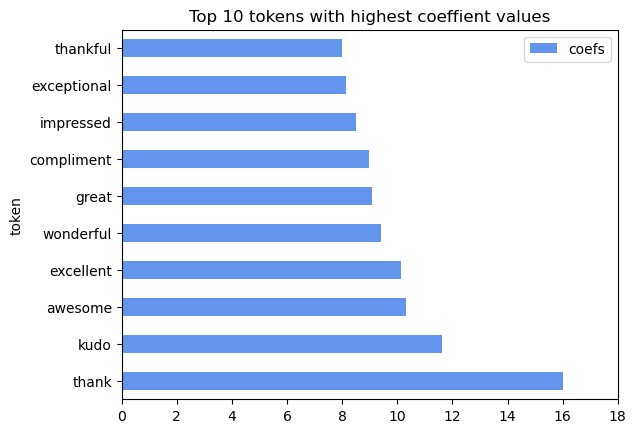

In [63]:
# Plot the top 10 tokens that have the highest coefs
pos_coef.sort_values('coefs', ascending=False) \
        .plot(kind='barh', 
              xlim=(0, 18),
              x='token',
              color='cornflowerblue',
              title='Top 10 tokens with highest coeffient values');

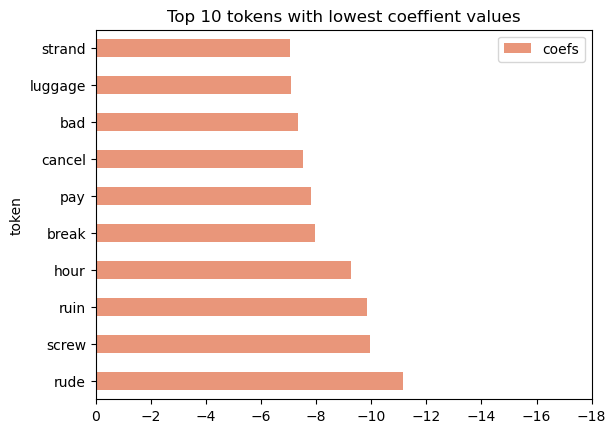

In [64]:
# Plot the top 10 tokens that have the lowest coefs
neg_coef.plot(kind='barh', 
              xlim=(0, -18),
              x='token',
              color='darksalmon',
              title='Top 10 tokens with lowest coeffient values');

Words like "ruin," "rude," and "hour" are strong indicators of negative sentiment, while "thank," "awesome," and "wonderful" are associated with positive sentiment. 

We will wrap up Part 2 with these plots. These coefficient terms and the words with the highest TF-IDF values provide different perspectives on the sentiment of tweets. If you'd like, take some time to compare the two sets of plots and see which one provides a better account of the sentiments conveyed in tweets.

<div class="alert alert-success">

## ‚ùó Key Points

* A Bag-of-Words representation is a simple method to transform our text data to numbers. It focuses on word frequency but not word order. 
* A TF-IDF representation is a step further; it also considers if a certain word distinctively appears in one document or occurs uniformally across all documents. 
* With a numerical representation, we can perform a range of text classification task, such as sentiment analysis. 

</div>